In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Heart_disease.csv")
data.head()

age  sex  cp  restbp  chol  fbs  restecg  maxhr  exang  oldpeak  slope  \
0   63    1   1     145   233    1        2    150      0      2.3      3   
1   67    1   4     160   286    0        2    108      1      1.5      2   
2   67    1   4     120   229    0        2    129      1      2.6      2   
3   37    1   3     130   250    0        0    187      0      3.5      3   
4   41    0   2     130   204    0        2    172      0      1.4      1   

    mv  thal  diagnosis  
0  0.0   6.0          0  
1  3.0   3.0          2  
2  2.0   7.0          1  
3  0.0   3.0          0  
4  0.0   3.0          0

In [3]:
data['disease'] = np.where(data['diagnosis']>0,1,0)
data.rename(columns={'diagnosis':'diag'},inplace= True)

In [4]:
data.head()

age  sex  cp  restbp  chol  fbs  restecg  maxhr  exang  oldpeak  slope  \
0   63    1   1     145   233    1        2    150      0      2.3      3   
1   67    1   4     160   286    0        2    108      1      1.5      2   
2   67    1   4     120   229    0        2    129      1      2.6      2   
3   37    1   3     130   250    0        0    187      0      3.5      3   
4   41    0   2     130   204    0        2    172      0      1.4      1   

    mv  thal  diag  disease  
0  0.0   6.0     0        0  
1  3.0   3.0     2        1  
2  2.0   7.0     1        1  
3  0.0   3.0     0        0  
4  0.0   3.0     0        0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbp   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   maxhr    303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  mv       299 non-null    float64
 12  thal     301 non-null    float64
 13  diag     303 non-null    int64  
 14  disease  303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


In [6]:
data.isnull().to_numpy().any()

True

In [7]:
data[data.isnull().any(axis=1)]

age  sex  cp  restbp  chol  fbs  restecg  maxhr  exang  oldpeak  slope  \
87    53    0   3     128   216    0        2    115      0      0.0      1   
166   52    1   3     138   223    0        0    169      0      0.0      1   
192   43    1   4     132   247    1        2    143      1      0.1      2   
266   52    1   4     128   204    1        0    156      1      1.0      2   
287   58    1   2     125   220    0        0    144      0      0.4      2   
302   38    1   3     138   175    0        0    173      0      0.0      1   

      mv  thal  diag  disease  
87   0.0   NaN     0        0  
166  NaN   3.0     0        0  
192  NaN   7.0     1        1  
266  0.0   NaN     2        1  
287  NaN   7.0     0        0  
302  NaN   3.0     0        0

<AxesSubplot:>

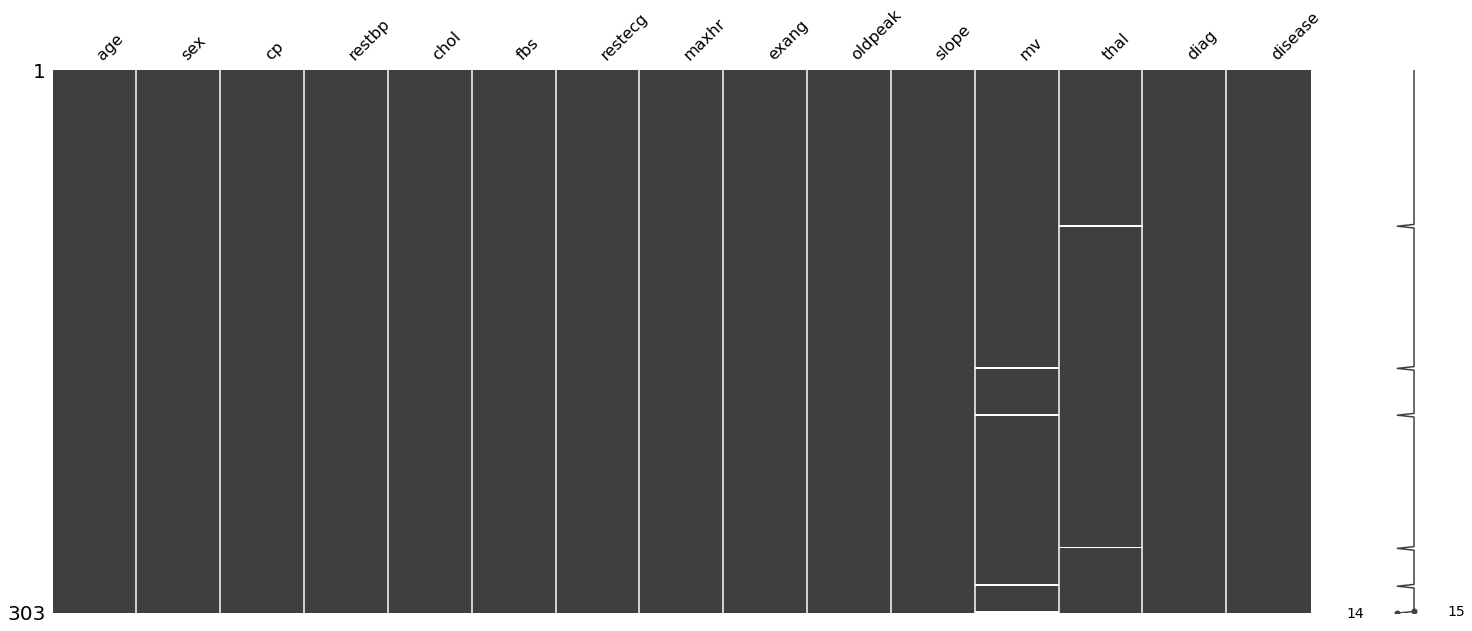

In [8]:
import missingno as msno

msno.matrix(data)

In [9]:
data = data.fillna(data.median())

In [10]:
data.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
maxhr      0
exang      0
oldpeak    0
slope      0
mv         0
thal       0
diag       0
disease    0
dtype: int64

In [11]:
#type of variable
data.nunique()

age         41
sex          2
cp           4
restbp      50
chol       152
fbs          2
restecg      3
maxhr       91
exang        2
oldpeak     40
slope        3
mv           4
thal         3
diag         5
disease      2
dtype: int64

In [12]:
data.dtypes

age          int64
sex          int64
cp           int64
restbp       int64
chol         int64
fbs          int64
restecg      int64
maxhr        int64
exang        int64
oldpeak    float64
slope        int64
mv         float64
thal       float64
diag         int64
disease      int64
dtype: object

In [13]:
#check for the duplicate rows
duplicated = data.duplicated().sum()
if duplicated:
    print('Duplicates Rows in DataSet are: {}'.format(duplicated))
else:
    print('Dataset contains no Duplicate Values')


Dataset contains no Duplicate Values


In [14]:
data.describe()

age         sex          cp      restbp        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg       maxhr       exang     oldpeak       slope          mv  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.934375   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal        diag     disease  
count  303.000000  303.000000  303.000000  
mean     4.722772    0.937294    0.458746  
std      1.938383    1.228536    0.499120  
min      3.000000    0.000000    0.000000  
25%      3.000000    0.000000    0.000000  
50%      3.000000    0.000000    0.000000  
75%      7.000000    2.000000    1.000000  
max      7.000000    4.000000    1.000000

age           AxesSubplot(0.125,0.657941;0.133621x0.222059)
sex        AxesSubplot(0.285345,0.657941;0.133621x0.222059)
cp          AxesSubplot(0.44569,0.657941;0.133621x0.222059)
restbp     AxesSubplot(0.606034,0.657941;0.133621x0.222059)
chol       AxesSubplot(0.766379,0.657941;0.133621x0.222059)
fbs           AxesSubplot(0.125,0.391471;0.133621x0.222059)
restecg    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
maxhr       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
exang      AxesSubplot(0.606034,0.391471;0.133621x0.222059)
oldpeak    AxesSubplot(0.766379,0.391471;0.133621x0.222059)
slope            AxesSubplot(0.125,0.125;0.133621x0.222059)
mv            AxesSubplot(0.285345,0.125;0.133621x0.222059)
thal           AxesSubplot(0.44569,0.125;0.133621x0.222059)
diag          AxesSubplot(0.606034,0.125;0.133621x0.222059)
disease       AxesSubplot(0.766379,0.125;0.133621x0.222059)
dtype: object

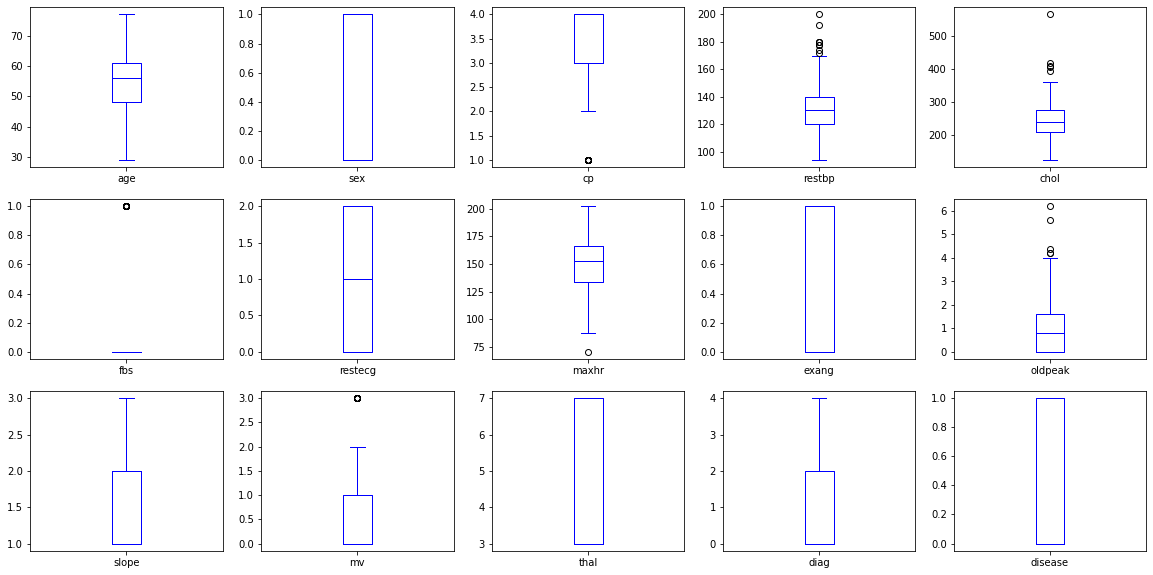

In [15]:
#plot outliers
data.plot(kind="box", subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(20,10), color='blue')

In [16]:
#function to list all the outliers
continous_features = ['age','restbp','chol','maxhr','oldpeak']
def outliers(data_out, drop = False):
    for each_features in data_out.columns:
        feature_data = data_out[each_features]
        q1 = np.percentile(feature_data, 25.)
        q3 = np.percentile(feature_data, 75.)
        
        IQR = q3-q1
        
        outlier_step = IQR * 1.5
        
        outliers = feature_data[~((feature_data >= q1-outlier_step) & (feature_data <= q3 + outlier_step))].index.tolist()
        
        if not drop:
            print('For the feature {}, No. of outliers is {}'.format(each_features, len(outliers)))
        
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_features))

outliers(data[continous_features])

For the feature age, No. of outliers is 0
For the feature restbp, No. of outliers is 9
For the feature chol, No. of outliers is 5
For the feature maxhr, No. of outliers is 1
For the feature oldpeak, No. of outliers is 5


In [17]:
#drop the outliers
outliers(data[continous_features], drop = True)

Outliers from age feature removed
Outliers from restbp feature removed
Outliers from chol feature removed
Outliers from maxhr feature removed
Outliers from oldpeak feature removed


In [18]:
data.shape

(284, 15)

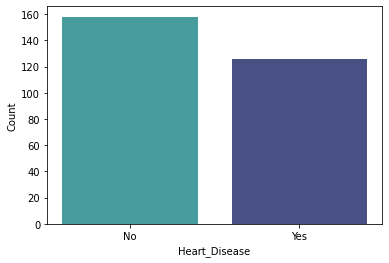

In [19]:
#distribution and relationship

#visualizing the data using graphs and various plotting techniques

#1) count of patients who do and don't have heart disease

plt.bar(data['disease'].unique(), data['disease'].value_counts(), color = ['#479D9E', '#495084'])
positions = (0,1)
plt.xticks(positions, ('No','Yes'))
plt.xlabel('Heart_Disease')
plt.ylabel('Count')
plt.show()

In [20]:
data['disease'].value_counts()

0    158
1    126
Name: disease, dtype: int64

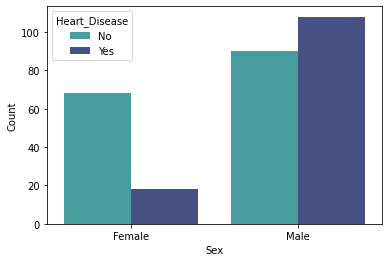

In [21]:
#2) countplot to know the ratio of patients with heardisease and between female and male

countplot = sns.countplot(x='sex', hue='disease', data=data, palette="mako_r")
countplot.set_xlabel('Sex')
countplot.set_xticklabels(['Female','Male'])
plt.legend(title='Heart_Disease', loc="upper left", labels=['No','Yes'])
plt.ylabel('Count')
plt.show()

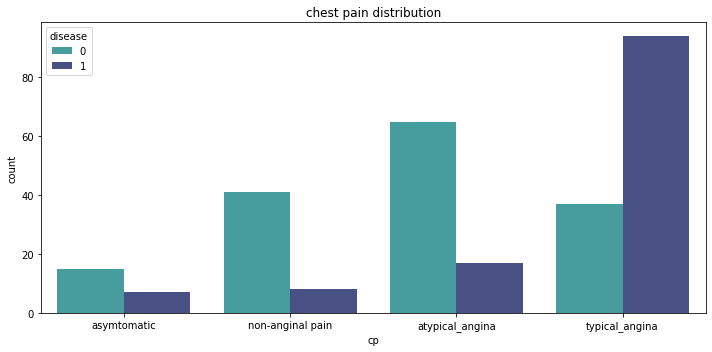

In [22]:
#chest pain distribution according to disease variable

fig, ax = plt.subplots(figsize=(10,5))
name = data['cp']
ax = sns.countplot(x='cp', hue='disease', data=data,palette='mako_r')
ax.set_title("chest pain distribution")
ax.set_xticklabels(['asymtomatic','non-anginal pain','atypical_angina','typical_angina'], rotation = 0)


plt.tight_layout()

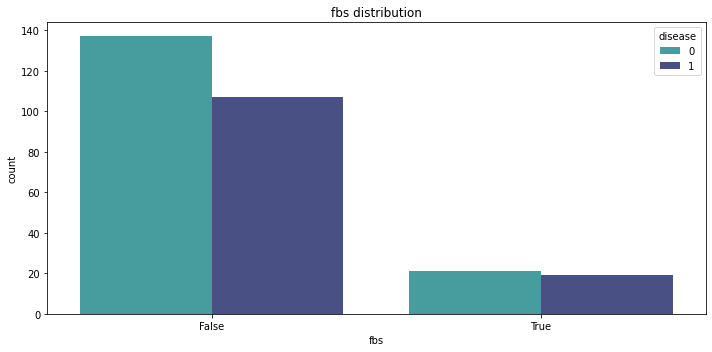

In [23]:
#fasting blood sugar distribution according to target variable
fig, ax = plt.subplots(figsize=(10,5))
name = data['fbs']
ax = sns.countplot(x='fbs', hue='disease', data=data,palette = 'mako_r')
ax.set_title("fbs distribution")
ax.set_xticklabels(['False','True'], rotation=0)

plt.tight_layout()

/Users/pawandubey/Desktop/Heart/venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


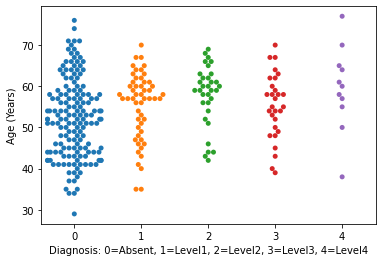

In [24]:
#swarm plot
sns.swarmplot(x='diag', y='age', data=data)
plt.xlabel('Diagnosis: 0=Absent, 1=Level1, 2=Level2, 3=Level3, 4=Level4')
plt.ylabel('Age (Years)')
plt.show()

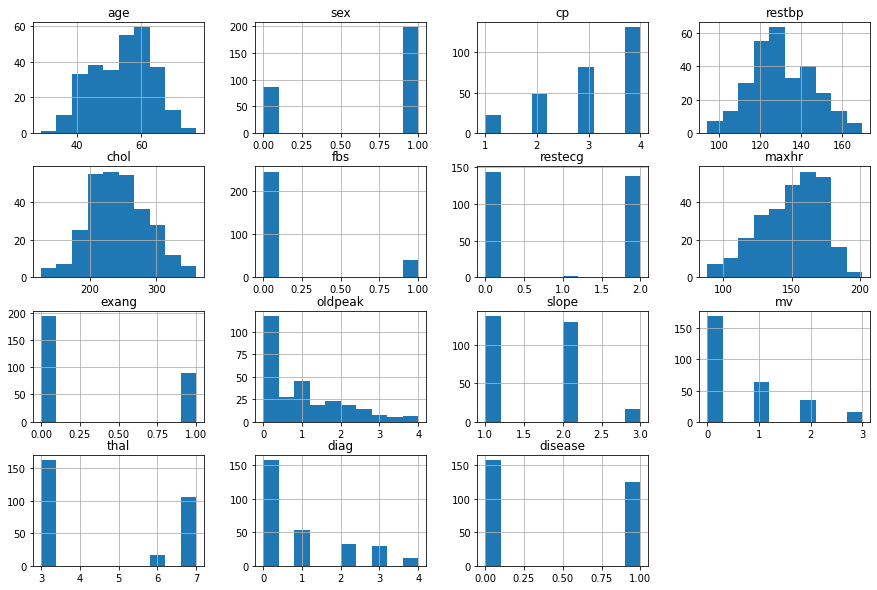

In [25]:
#histogram
data.hist(figsize=(15,10))
plt.show()

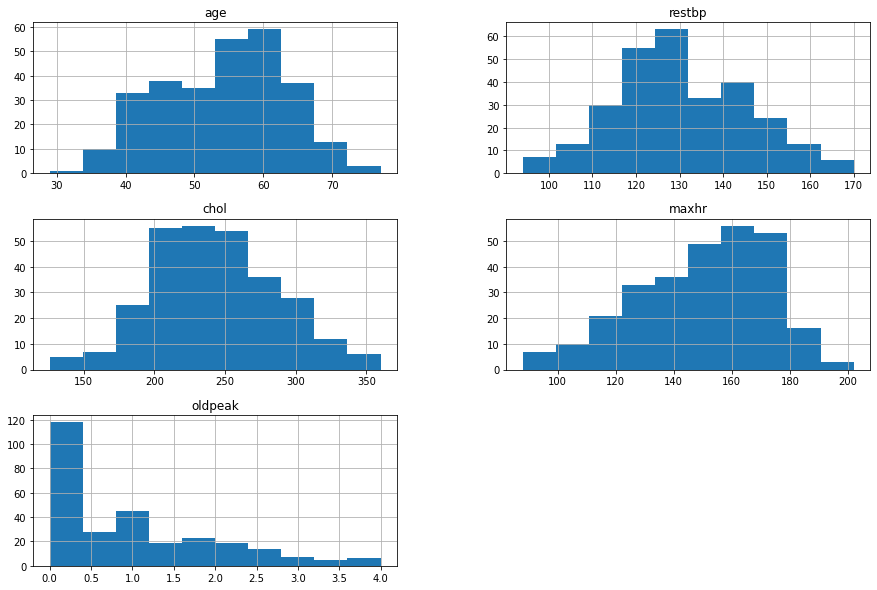

In [26]:
#distribution plot on continous variables
continous_features = ['age','restbp','chol','maxhr','oldpeak']
data.hist(continous_features,figsize=(15,10))
plt.show()


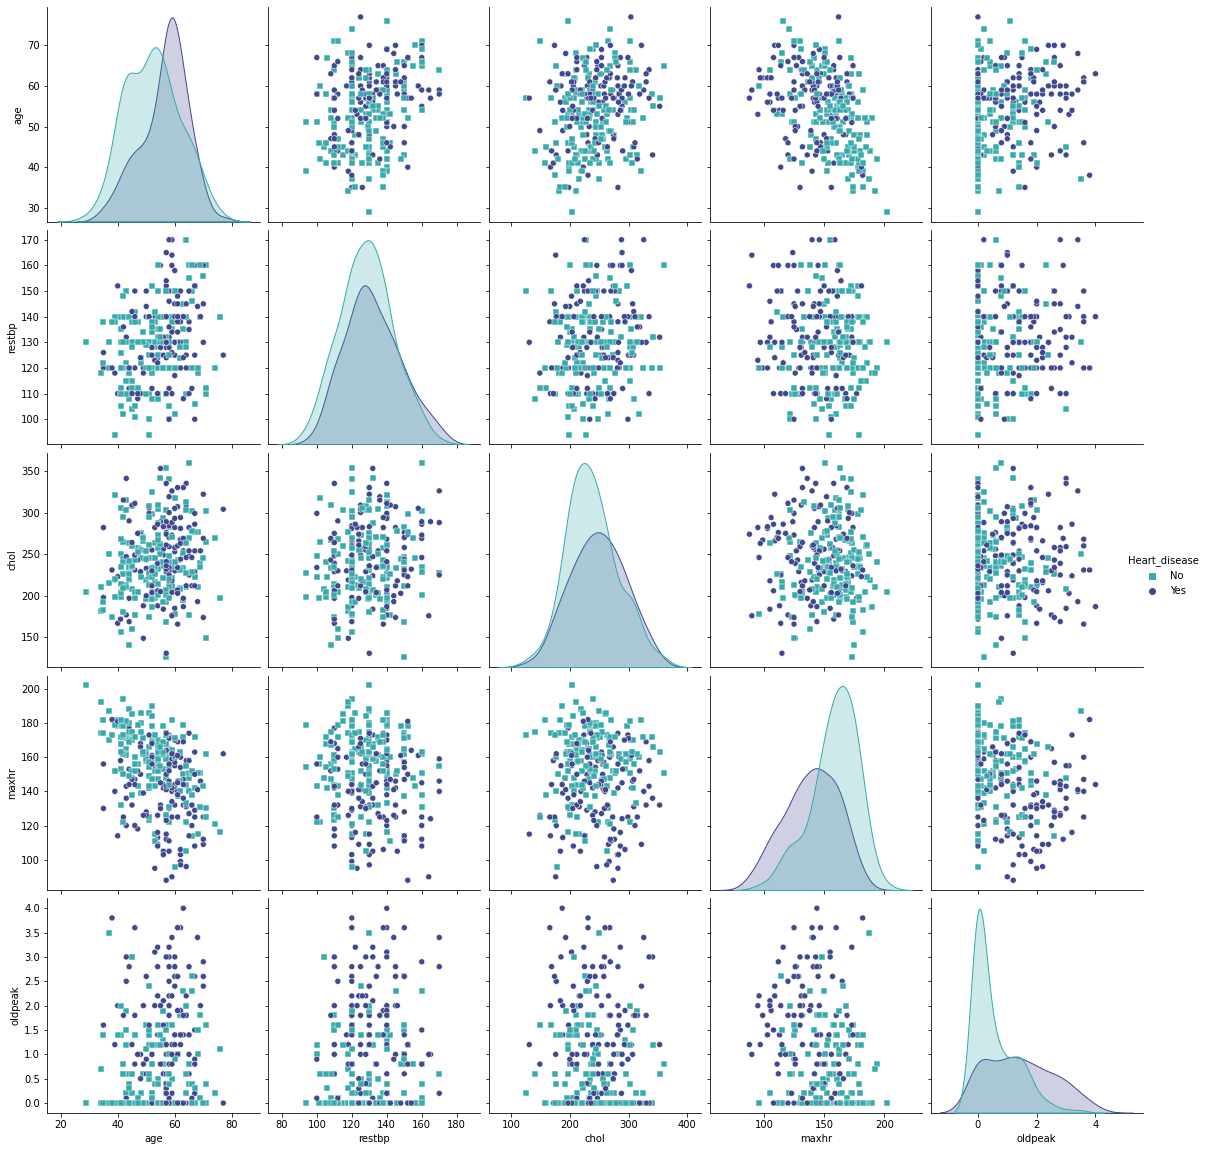

In [27]:
#pair plot to visulaize the distribution


#Shows relationship between variables by target variable 
g = sns.pairplot(data,palette='mako_r', height=3.25, hue='disease',markers=['s','o'], vars=['age','restbp','chol','maxhr','oldpeak'])

#replace legend title
new_title = 'Heart_disease'
g._legend.set_title(new_title)

#replace legend labels
new_labels = ['No','Yes']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)
plt.show()  

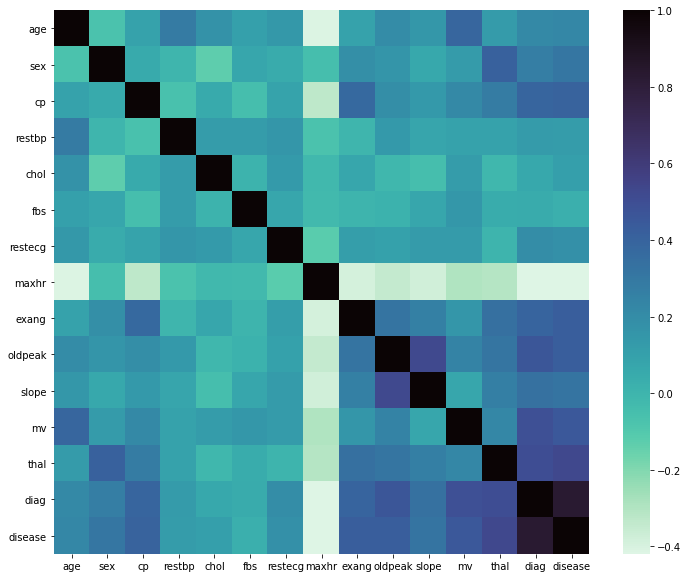

In [28]:
#correlation matrix

f, ax = plt.subplots(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="mako_r")
plt.show()

In [29]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title = 'Heart disease using EDA', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

# Importing machine learning libraries

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [31]:
#import other dependent libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
from sklearn import metrics
from io import StringIO
import pydotplus

In [32]:
features = ['age','sex','cp','restbp','chol','fbs','restecg','maxhr','exang','oldpeak','slope','mv','thal']

X= data[features]
Y= data['disease']

In [33]:
#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [34]:
#model fitting

# 1) Decision Tree

dtree_1 = tree.DecisionTreeClassifier()
dtree_1.fit(X_train,Y_train)
y_pred = dtree_1.predict(X_test)

In [35]:
#model performance
count_misclassified = (Y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 14
Accuracy: 0.75


In [36]:
#accuracy
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[30 12]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        42
           1       0.52      0.87      0.65        15

    accuracy                           0.75        57
   macro avg       0.73      0.79      0.73        57
weighted avg       0.83      0.75      0.77        57



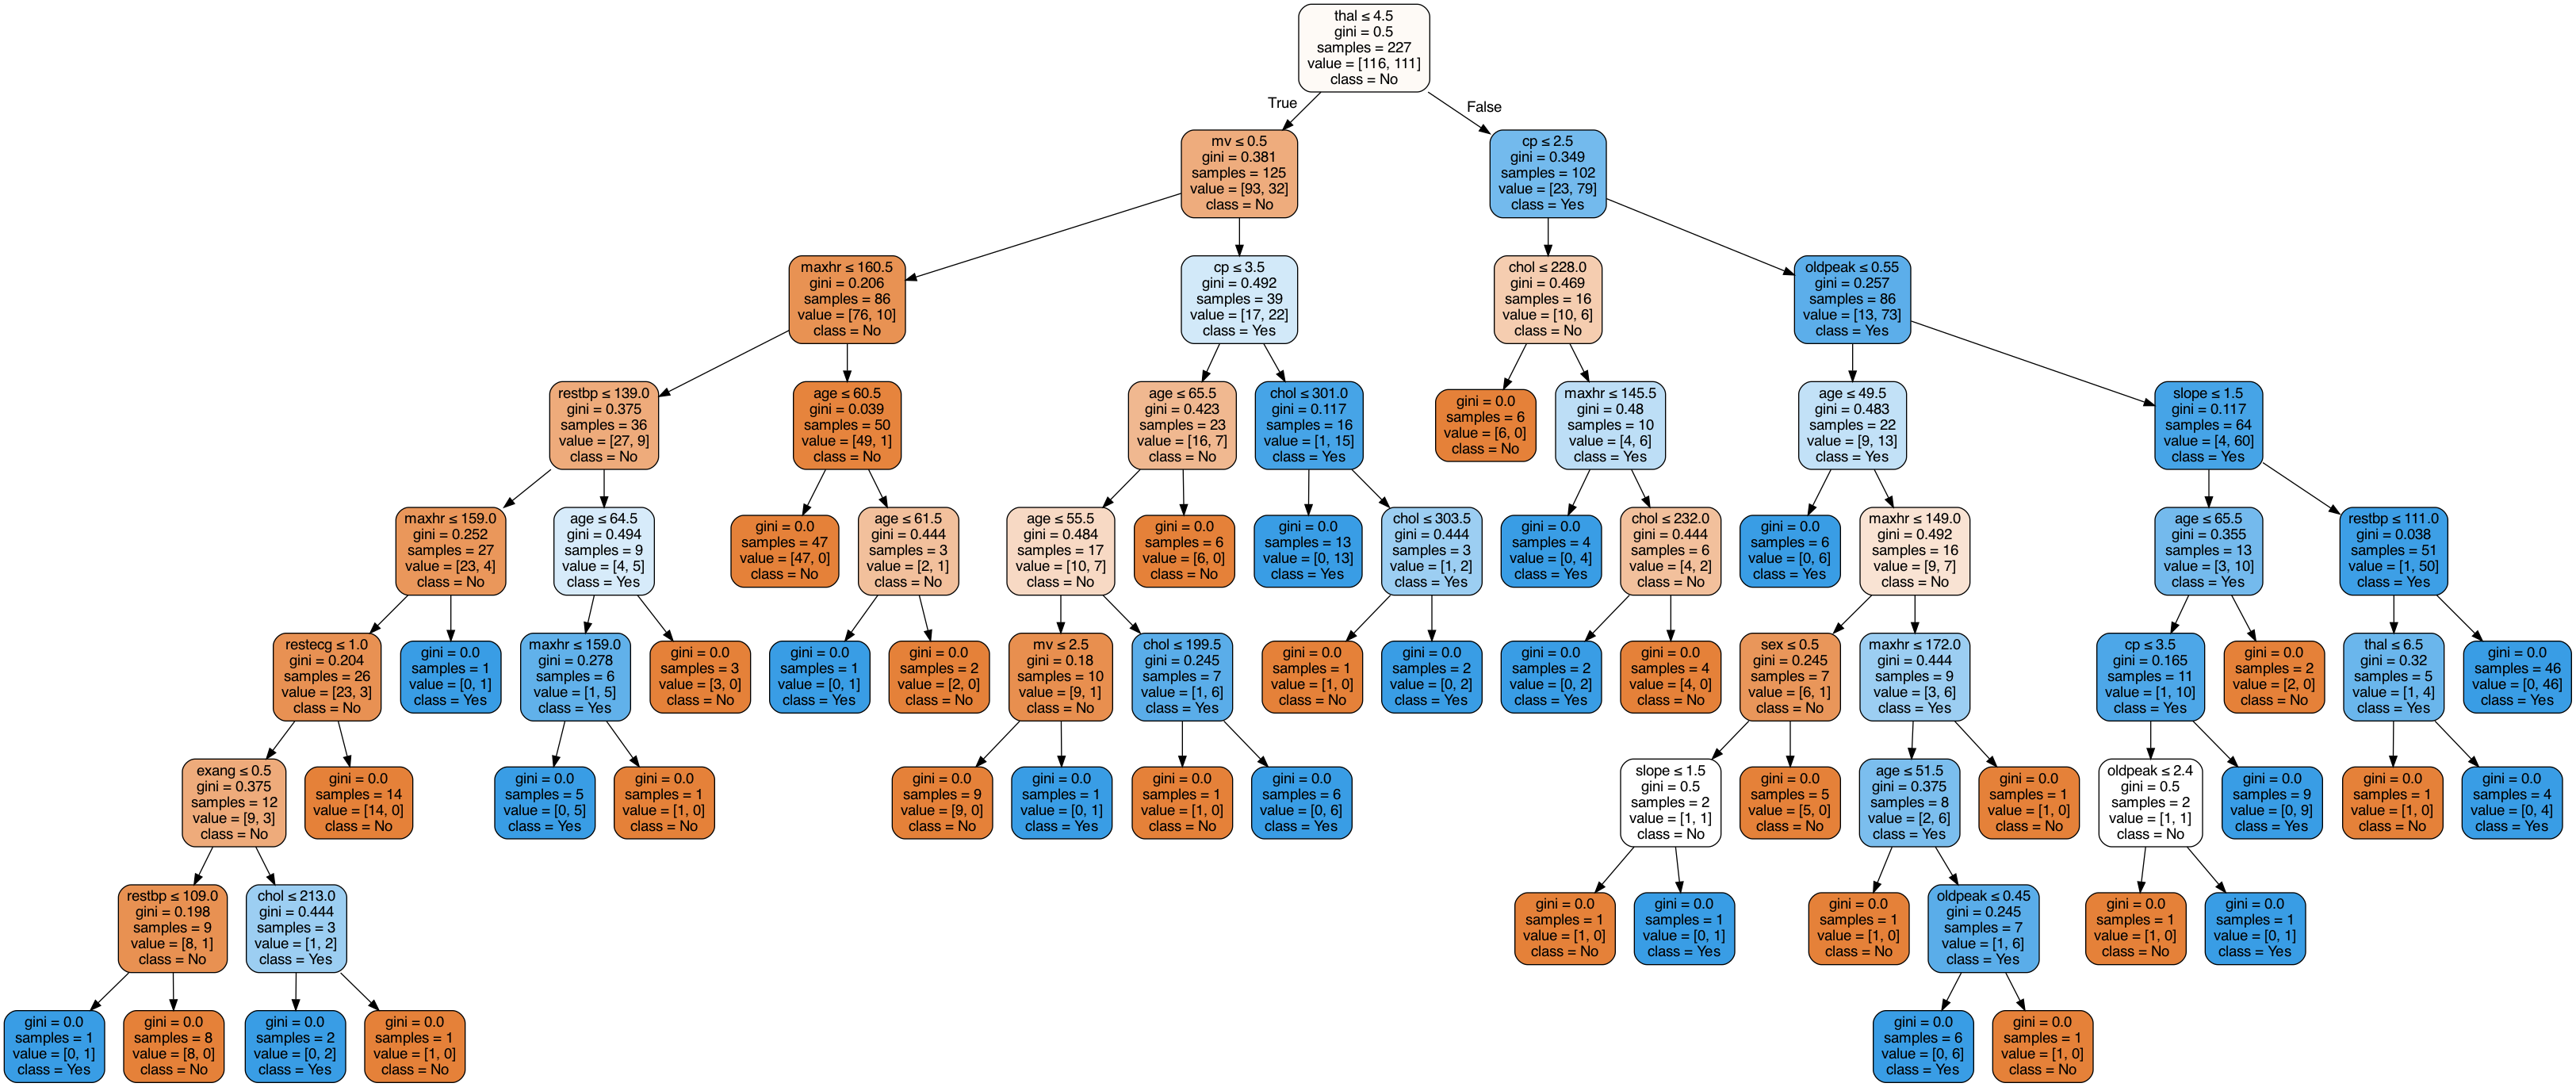

In [37]:
dot_data = StringIO()
export_graphviz(dtree_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decisiontree.png')
Image(graph.create_png())

In [38]:
#KNN Model

"""
To make this algorithm more accurate feature scaling is needed to scale the features 
so they can be evaluated uniformly. To normalize the range of all the features 
I used the StandardScaler method to transform the data so the distribution 
will have a mean value 0 and standard deviation of 1."""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
#KNN Models fitting

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

In [40]:
print(confusion_matrix(Y_test, Y_pred_knn))
print(classification_report(Y_test, Y_pred_knn))

[[32 10]
 [ 4 11]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        42
           1       0.52      0.73      0.61        15

    accuracy                           0.75        57
   macro avg       0.71      0.75      0.72        57
weighted avg       0.79      0.75      0.77        57



In [41]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_knn)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.75


In [42]:
#accuracy from neighbors 1 to 20

accuracy = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred_knn))
    
print(accuracy)
print()
max_accuracy = max(accuracy)
print(max_accuracy)
print()
print(accuracy.index(max_accuracy)+1)

[0.7719298245614035, 0.8070175438596491, 0.8070175438596491, 0.8421052631578947, 0.8245614035087719, 0.8245614035087719, 0.7543859649122807, 0.8070175438596491, 0.8070175438596491, 0.8421052631578947, 0.8421052631578947, 0.8771929824561403, 0.8596491228070176, 0.8596491228070176, 0.8596491228070176, 0.8421052631578947, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403]

0.8771929824561403

12


In [43]:
error = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    error.append(np.mean(Y_pred_knn != Y_test))

Text(0, 0.5, 'Mean error')

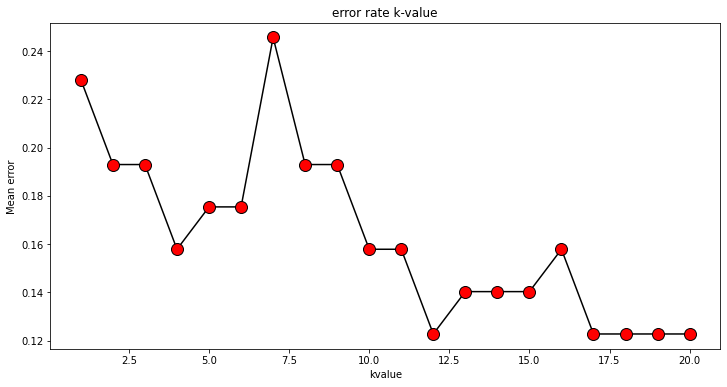

In [44]:
plt.figure(figsize=(12,6))
plt.plot(range(1,21), error, color='black', linestyle='solid',marker ='o', markerfacecolor='red', markersize=12)
plt.title('error rate k-value')
plt.xlabel('kvalue')
plt.ylabel('Mean error')

In [45]:
#KNN Models fitting

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

In [46]:
print(confusion_matrix(Y_test, Y_pred_knn))
print(classification_report(Y_test, Y_pred_knn))

[[39  3]
 [ 4 11]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.79      0.73      0.76        15

    accuracy                           0.88        57
   macro avg       0.85      0.83      0.84        57
weighted avg       0.88      0.88      0.88        57



In [47]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_knn)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.88


In [48]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train,Y_train)
Y_pred_rf = model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))

[[35  7]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        42
           1       0.65      0.87      0.74        15

    accuracy                           0.84        57
   macro avg       0.80      0.85      0.81        57
weighted avg       0.87      0.84      0.85        57



In [50]:

accuracy = metrics.accuracy_score(Y_test, Y_pred_rf)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.84


In [51]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB 

nb = GaussianNB()
Y_train = Y_train.astype('int')

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred_nb))
print(classification_report(Y_test, Y_pred_nb))

[[34  8]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        42
           1       0.62      0.87      0.72        15

    accuracy                           0.82        57
   macro avg       0.78      0.84      0.80        57
weighted avg       0.86      0.82      0.83        57



In [53]:

accuracy = metrics.accuracy_score(Y_test, Y_pred_nb)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.82
